In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("data/data.csv")

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [5]:
# Changing Column name for better Understanding.
# Column name mapping (already generated above)
column_mapping = {
    'Id': 'ID',
    'MSSubClass': 'BuildingClass',
    'MSZoning': 'ZoningClass',
    'LotFrontage': 'LotFrontageFt',
    'LotArea': 'LotAreaSqFt',
    'Street': 'StreetType',
    'Alley': 'AlleyAccess',
    'LotShape': 'LotShape',
    'LandContour': 'LandContour',
    'Utilities': 'UtilityAccess',
    'LotConfig': 'LotConfiguration',
    'LandSlope': 'LandSlopeType',
    'Neighborhood': 'NeighborhoodName',
    'Condition1': 'ConditionPrimary',
    'Condition2': 'ConditionSecondary',
    'BldgType': 'BuildingType',
    'HouseStyle': 'HouseStyle',
    'OverallQual': 'OverallQuality',
    'OverallCond': 'OverallCondition',
    'YearBuilt': 'YearBuilt',
    'YearRemodAdd': 'YearRemodeled',
    'RoofStyle': 'RoofStyle',
    'RoofMatl': 'RoofMaterial',
    'Exterior1st': 'ExteriorCovering1',
    'Exterior2nd': 'ExteriorCovering2',
    'MasVnrType': 'MasonryType',
    'MasVnrArea': 'MasonryArea',
    'ExterQual': 'ExteriorQuality',
    'ExterCond': 'ExteriorCondition',
    'Foundation': 'FoundationType',
    'BsmtQual': 'BasementQuality',
    'BsmtCond': 'BasementCondition',
    'BsmtExposure': 'BasementExposure',
    'BsmtFinType1': 'BasementFinishType1',
    'BsmtFinSF1': 'BasementFinishedArea1',
    'BsmtFinType2': 'BasementFinishType2',
    'BsmtFinSF2': 'BasementFinishedArea2',
    'BsmtUnfSF': 'BasementUnfinishedSF',
    'TotalBsmtSF': 'TotalBasementSF',
    'Heating': 'HeatingType',
    'HeatingQC': 'HeatingQuality',
    'CentralAir': 'CentralAirConditioning',
    'Electrical': 'ElectricalSystem',
    '1stFlrSF': 'FirstFloorSF',
    '2ndFlrSF': 'SecondFloorSF',
    'LowQualFinSF': 'LowQualitySF',
    'GrLivArea': 'AboveGroundLivingArea',
    'BsmtFullBath': 'BasementFullBath',
    'BsmtHalfBath': 'BasementHalfBath',
    'FullBath': 'FullBathrooms',
    'HalfBath': 'HalfBathrooms',
    'BedroomAbvGr': 'BedroomsAboveGround',
    'KitchenAbvGr': 'KitchensAboveGround',
    'KitchenQual': 'KitchenQuality',
    'TotRmsAbvGrd': 'TotalRoomsAboveGround',
    'Functional': 'Functionality',
    'Fireplaces': 'NumberOfFireplaces',
    'FireplaceQu': 'FireplaceQuality',
    'GarageType': 'GarageType',
    'GarageYrBlt': 'GarageYearBuilt',
    'GarageFinish': 'GarageFinishType',
    'GarageCars': 'GarageCapacity',
    'GarageArea': 'GarageArea',
    'GarageQual': 'GarageQuality',
    'GarageCond': 'GarageCondition',
    'PavedDrive': 'DrivewayPaved',
    'WoodDeckSF': 'WoodDeckArea',
    'OpenPorchSF': 'OpenPorchArea',
    'EnclosedPorch': 'EnclosedPorchArea',
    '3SsnPorch': 'ThreeSeasonPorchArea',
    'ScreenPorch': 'ScreenPorchArea',
    'PoolArea': 'PoolArea',
    'PoolQC': 'PoolQuality',
    'Fence': 'FenceType',
    'MiscFeature': 'MiscellaneousFeature',
    'MiscVal': 'MiscellaneousValue',
    'MoSold': 'MonthSold',
    'YrSold': 'YearSold',
    'SaleType': 'SaleType',
    'SaleCondition': 'SaleCondition',
    'SalePrice': 'SalePrice'
}

# Rename columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)

## Task 1 - Data Analysis

#### 1. Checking NaN values

In [6]:
NaN = df.isnull().sum()
NaN = NaN[NaN > 0].sort_values(ascending = False)
NaN_df = NaN.reset_index()
NaN_df.columns = ['Column', 'NaN']

In [7]:
NaN_df

,Column,NaN
0,PoolQuality,1453
1,MiscellaneousFeature,1406
2,AlleyAccess,1369
3,FenceType,1179
4,MasonryType,872
5,FireplaceQuality,690
6,LotFrontageFt,259
7,GarageType,81
8,GarageYearBuilt,81
9,GarageFinishType,81


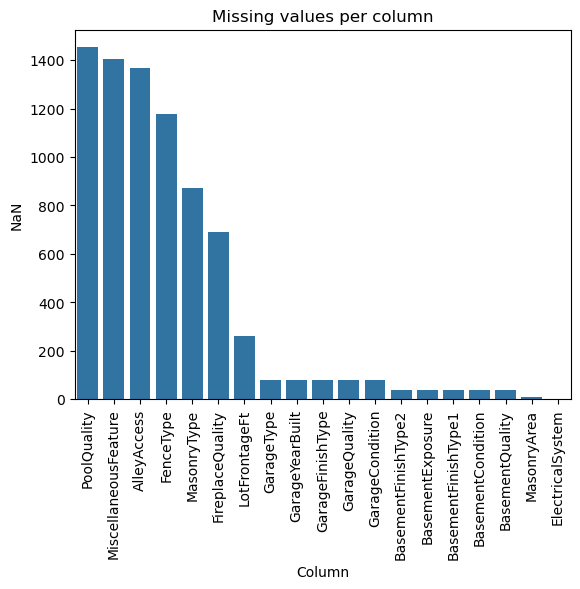

In [116]:
sns.barplot(x='Column', y = 'NaN', data=NaN_df)
plt.xticks(rotation = 90)
plt.title('Missing values per column')
plt.show()

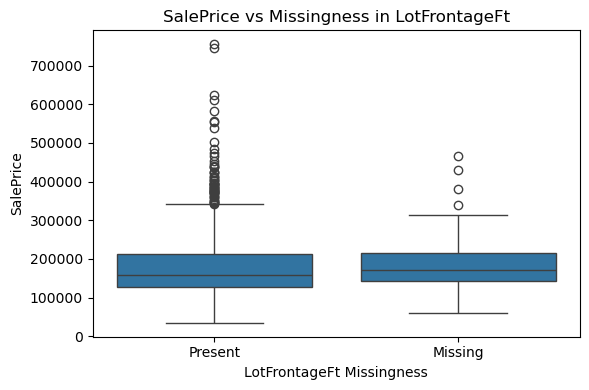

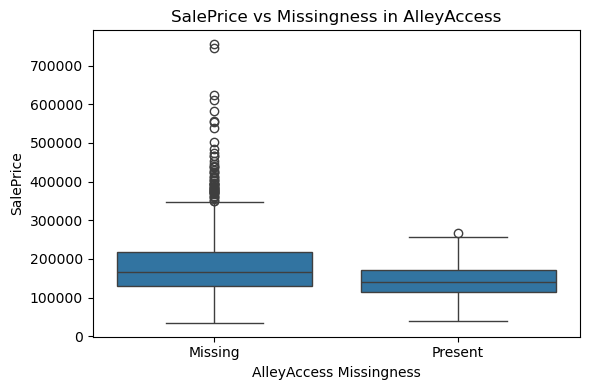

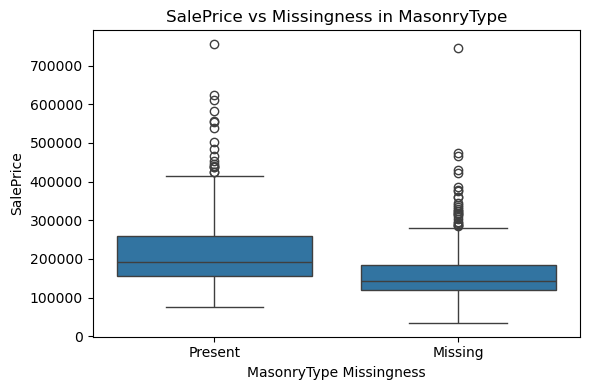

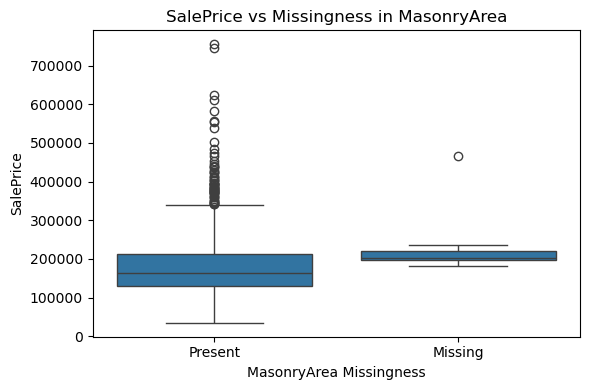

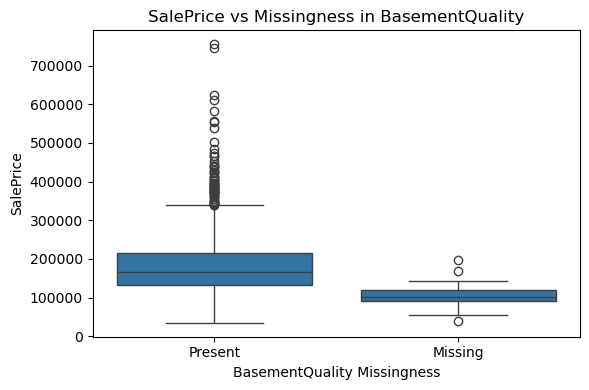

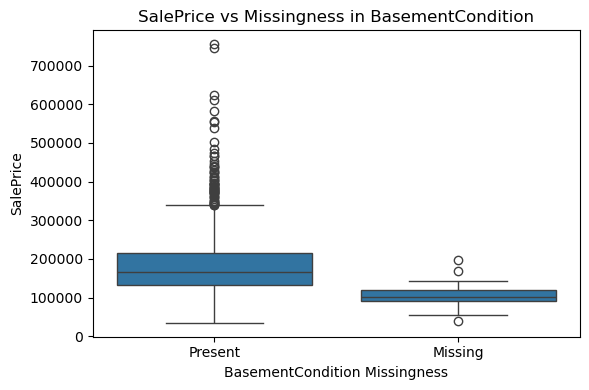

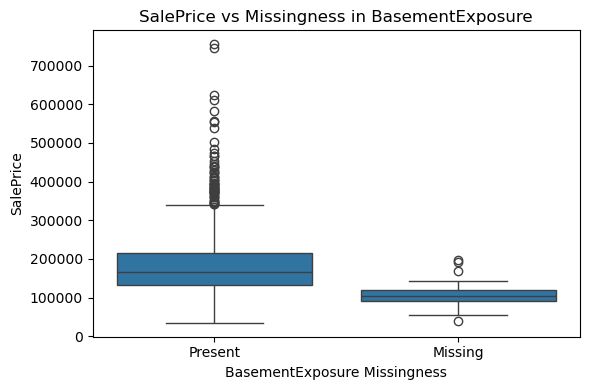

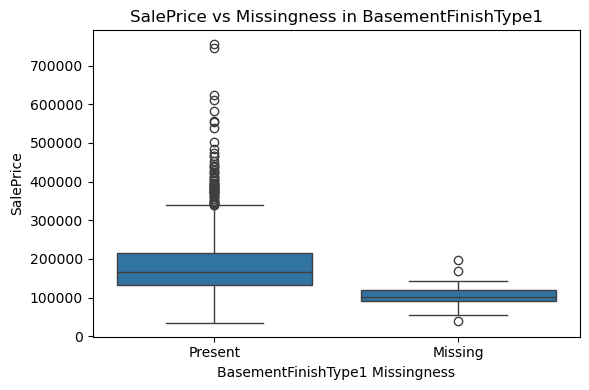

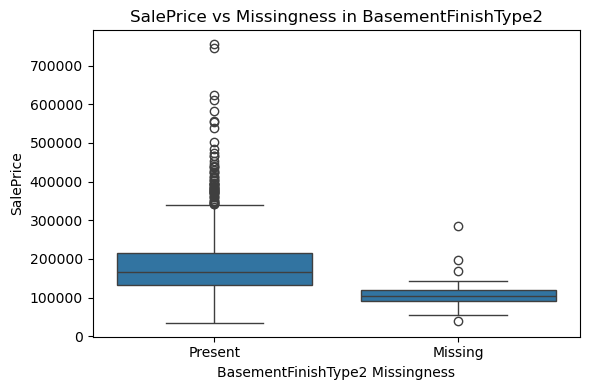

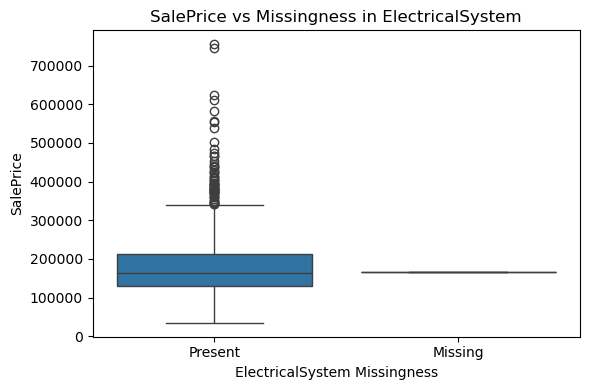

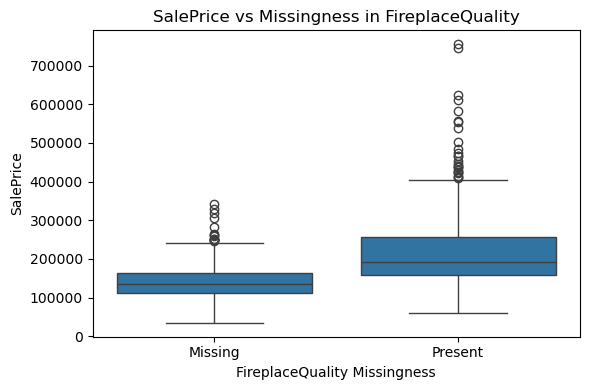

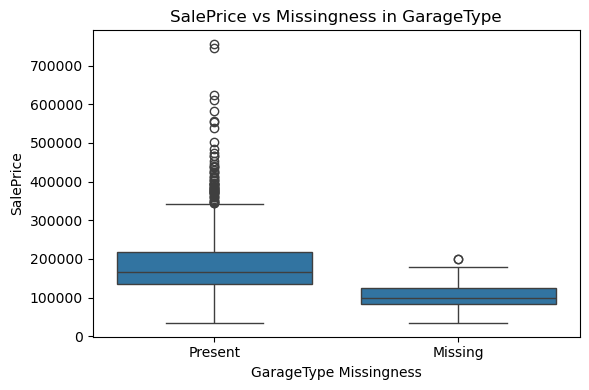

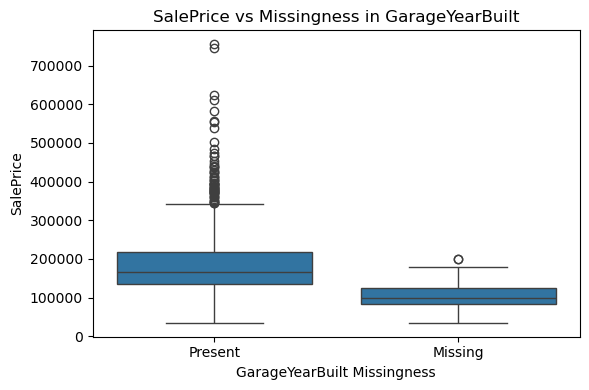

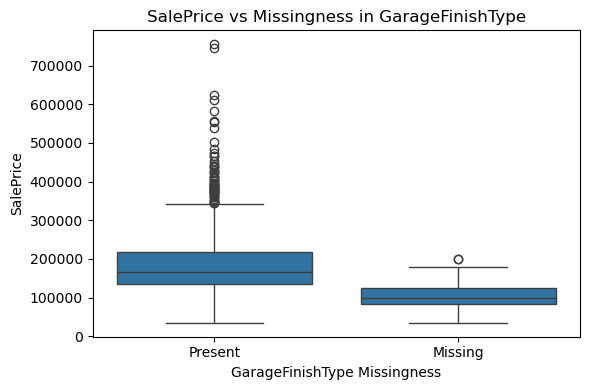

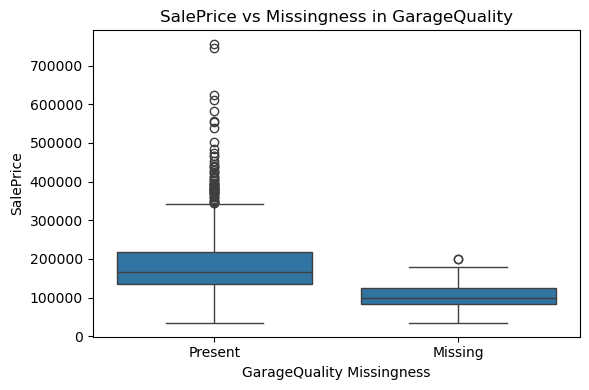

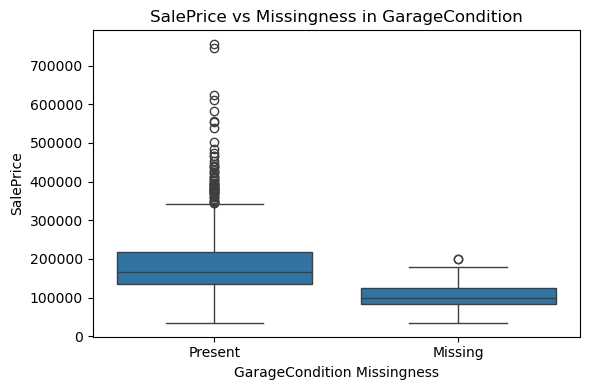

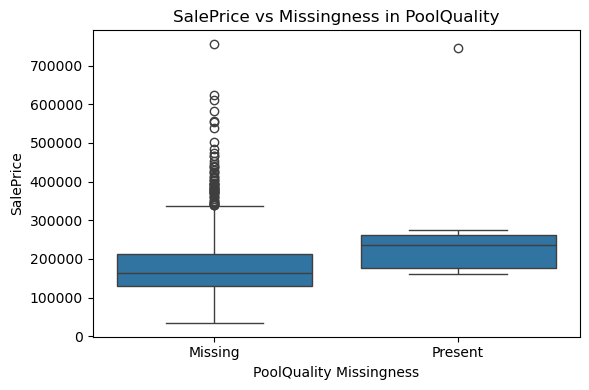

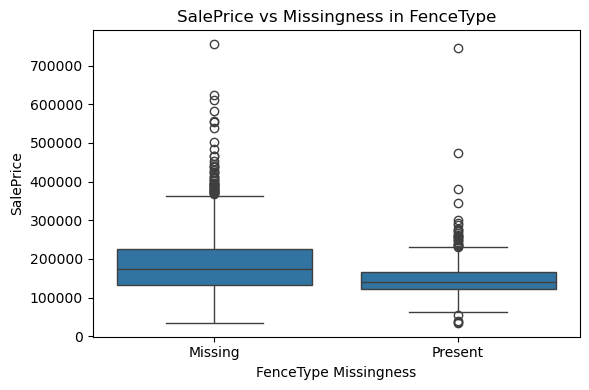

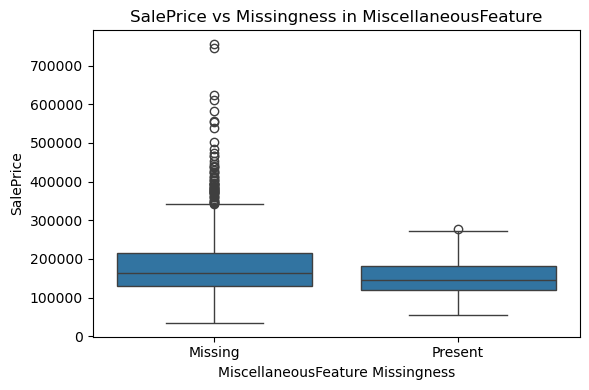

In [117]:
Missing_values = df.columns[df.isnull().sum() > 0]  # this is a list of column names
for feature in Missing_values:
    data = df.copy()
    
    # Create missing indicator
    data[feature + '_NA'] = np.where(data[feature].isnull(), 'Missing', 'Present')
    
    # Boxplot to show SalePrice distribution
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature + '_NA', y='SalePrice', data=data)
    plt.title(f'SalePrice vs Missingness in {feature}')
    plt.xlabel(f'{feature} Missingness')
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

#### -> Here we easily understood the impact of NaN on sales price using box plot.

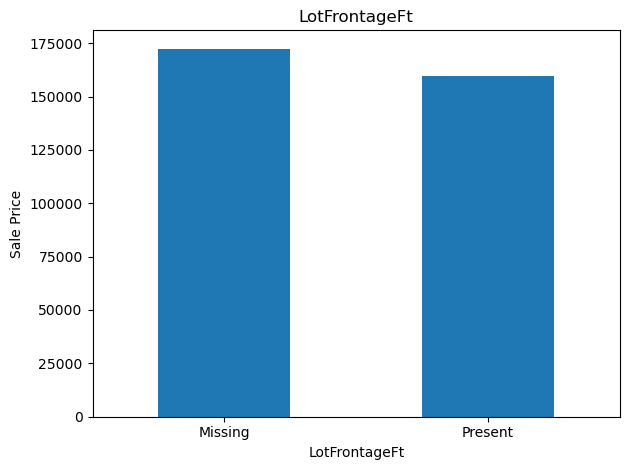

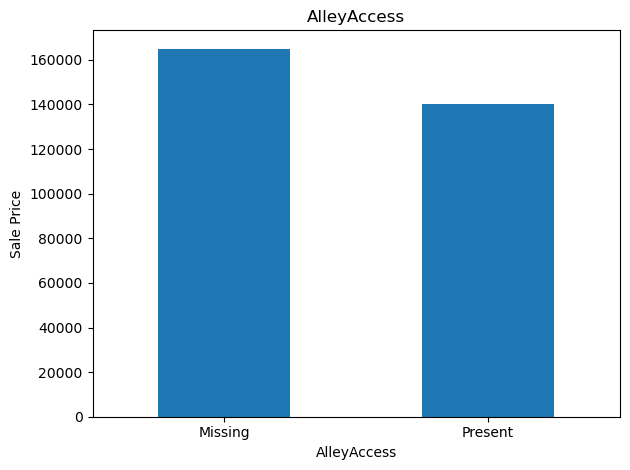

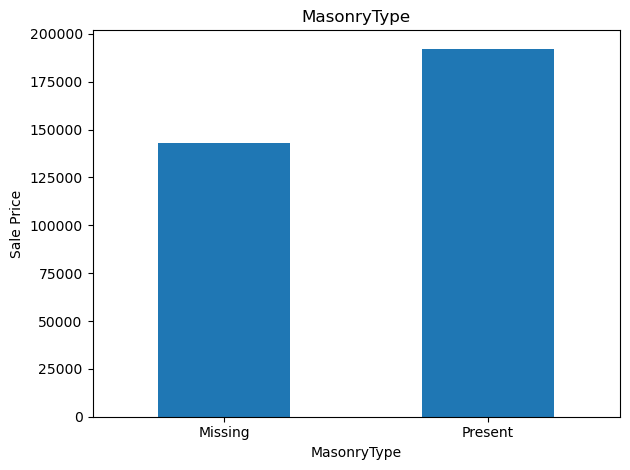

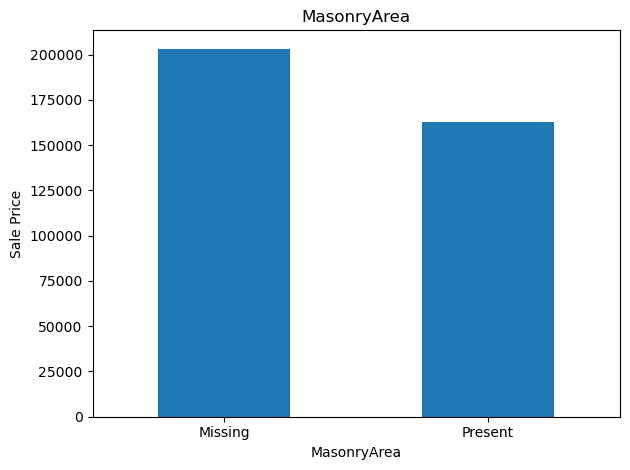

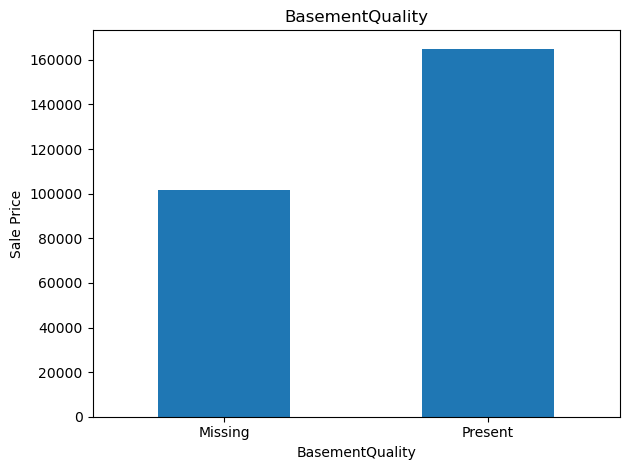

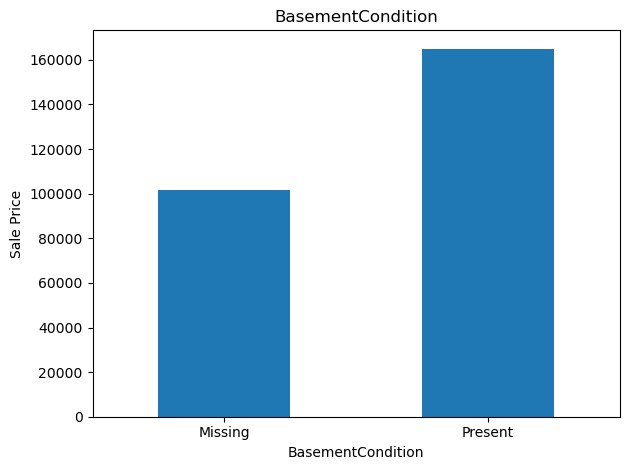

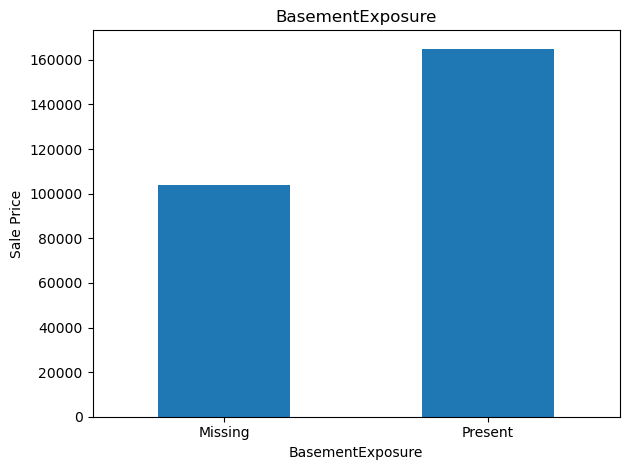

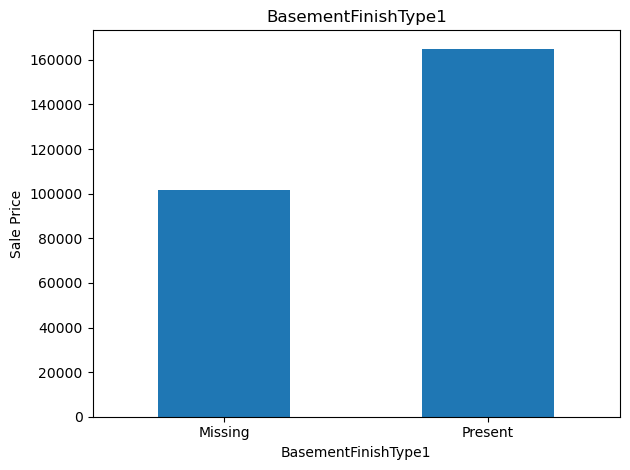

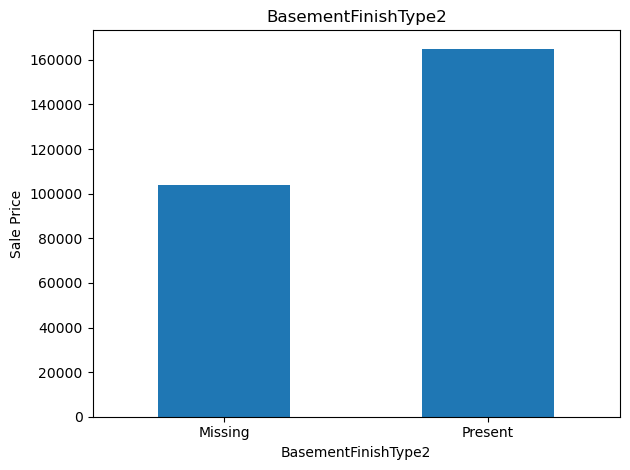

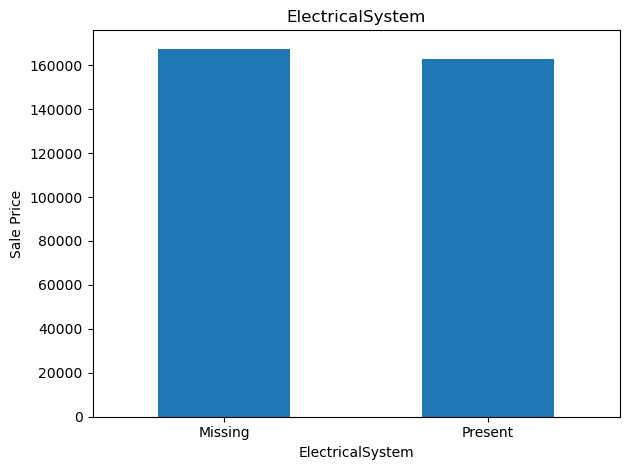

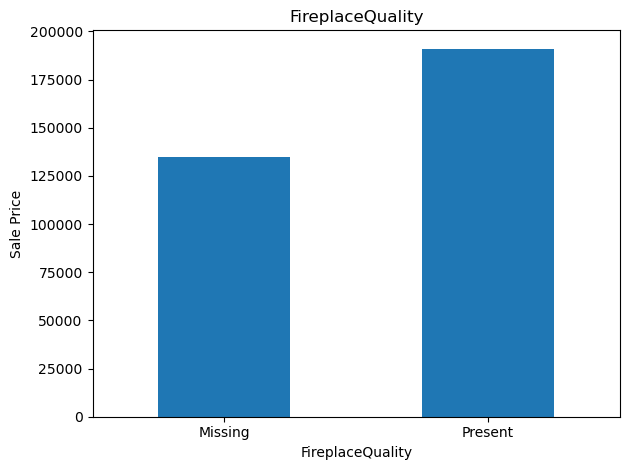

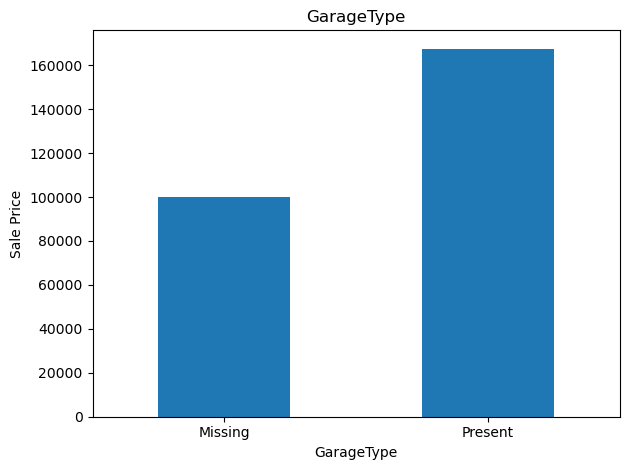

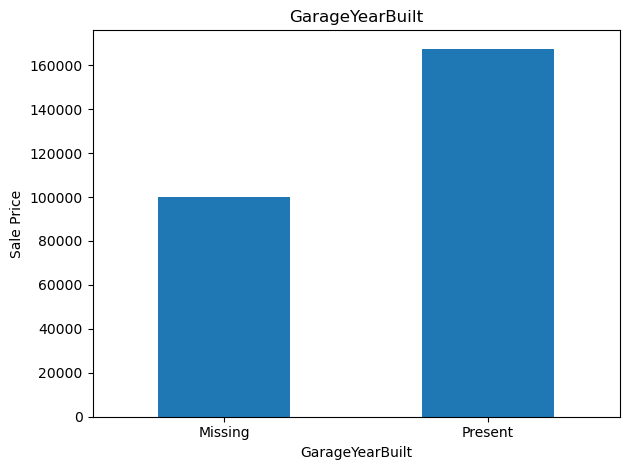

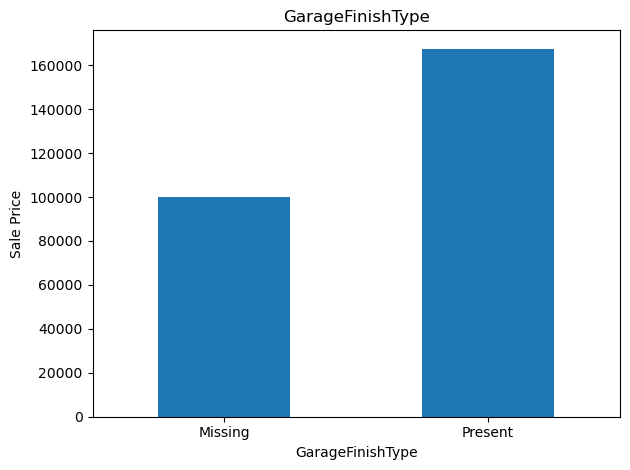

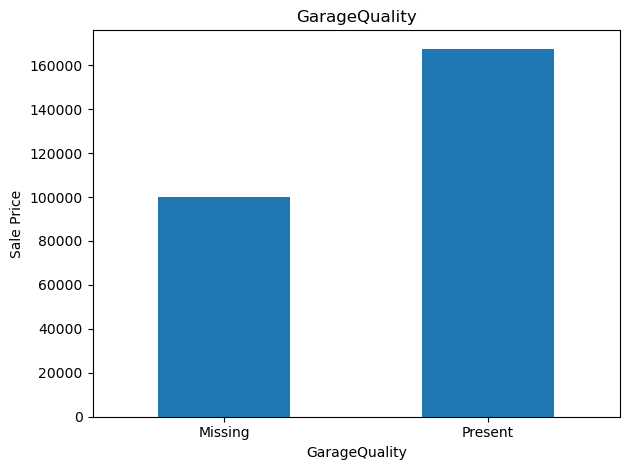

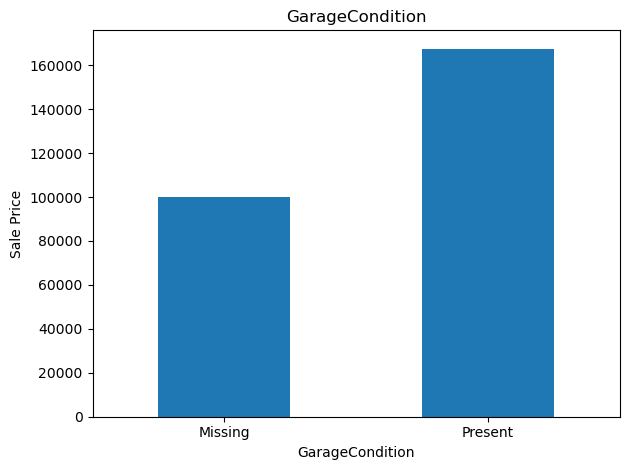

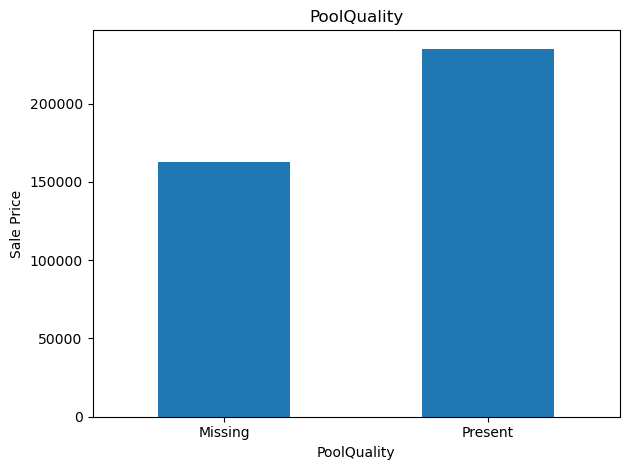

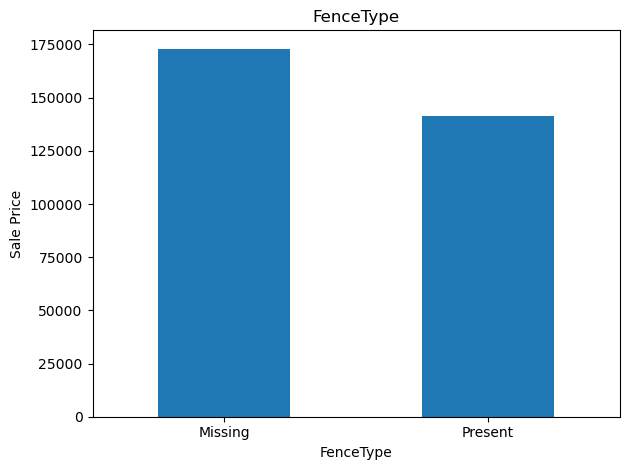

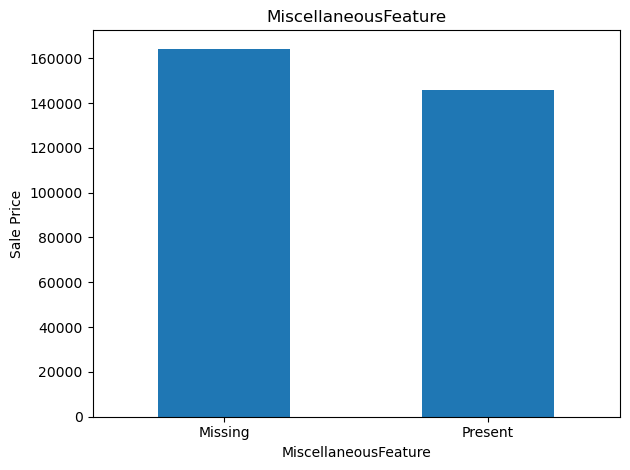

In [118]:
for feature in Missing_values:
    data = df.copy()
    
    # missing or present flag
    data[feature] = np.where(data[feature].isnull(), "Missing", "Present")
    
    # median SalePrice for missing/present and plot bar
    ax = data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    
    # Set x-axis labels horizontally
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # rotation=0 for horizontal
    plt.ylabel("Sale Price")
    plt.tight_layout()
    plt.show()

####  -> Here we easily understood the impact of NaN on sales price using bar plot.

### 2. Numerical Cols

In [8]:
# list of numerical cols
numerical_features = []

for feature in df.columns:
    if df[feature].dtypes != 'O':
        numerical_features.append(feature)
print("Length of numerical columns:",len(numerical_features))
numerical_df = df[numerical_features]
numerical_df.head(3)

Length of numerical columns: 38


,ID,BuildingClass,LotFrontageFt,LotAreaSqFt,OverallQuality,OverallCondition,YearBuilt,YearRemodeled,MasonryArea,BasementFinishedArea1,BasementFinishedArea2,BasementUnfinishedSF,TotalBasementSF,FirstFloorSF,SecondFloorSF,LowQualitySF,AboveGroundLivingArea,BasementFullBath,BasementHalfBath,FullBathrooms,HalfBathrooms,BedroomsAboveGround,KitchensAboveGround,TotalRoomsAboveGround,NumberOfFireplaces,GarageYearBuilt,GarageCapacity,GarageArea,WoodDeckArea,OpenPorchArea,EnclosedPorchArea,ThreeSeasonPorchArea,ScreenPorchArea,PoolArea,MiscellaneousValue,MonthSold,YearSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500


In [9]:
# list of year cols
year_features = [col for col in df.columns if 'year' in col.lower() or 'yr' in col.lower()]
year_df = df[year_features]
year_df.head(3)

,YearBuilt,YearRemodeled,GarageYearBuilt,YearSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008


In [10]:
# unique values of year_df
for col in year_df:
    unique_values = df[col].unique()
    print(f"\nUnique values in {col}:")
    print(np.sort(unique_values))


Unique values in YearBuilt:
[1872 1875 1880 1882 1885 1890 1892 1893 1898 1900 1904 1905 1906 1908
 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923
 1924 1925 1926 1927 1928 1929 1930 1931 1932 1934 1935 1936 1937 1938
 1939 1940 1941 1942 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]

Unique values in YearRemodeled:
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]

Unique values in GarageYearBuilt:
[1900. 1906. 1908. 1910

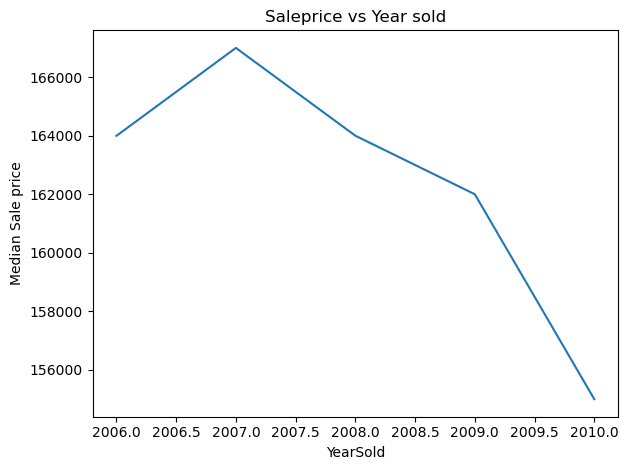

In [11]:
# Lets analyse the relation b/w House year sold and sale price
df.groupby('YearSold')['SalePrice'].median().plot()
plt.ylabel('Median Sale price')
plt.title('Saleprice vs Year sold')
plt.tight_layout()

#### -> By analysing graph one can say that, the highest median price of house was in 2007.
#### -> And after 2007 there is inverse relation b/w house price and year sold.

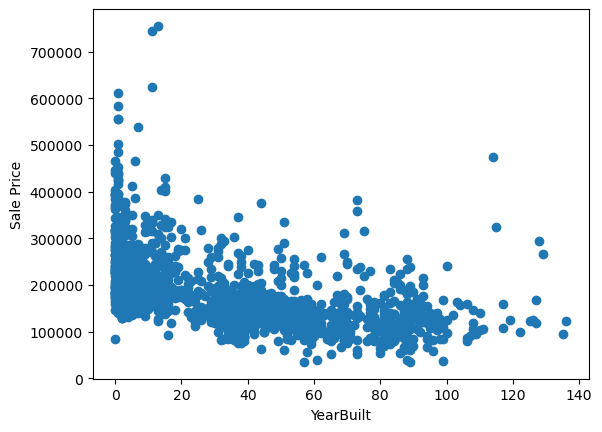

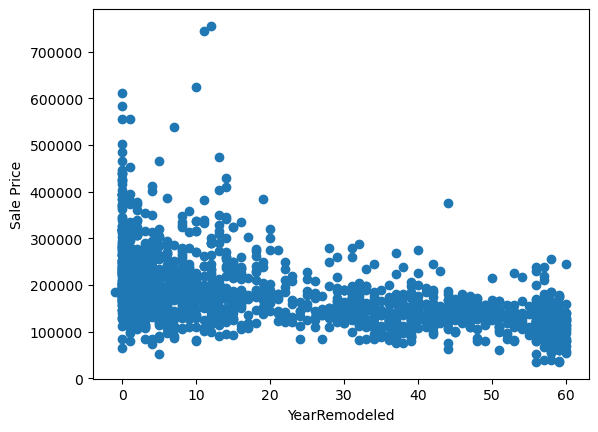

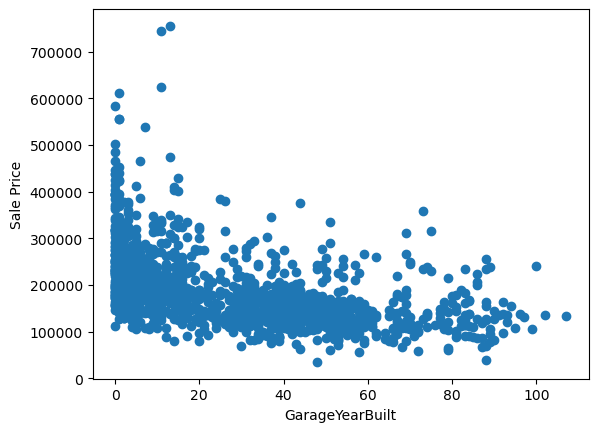

In [126]:
# House age vs house price.
for col in year_df:
    if(col != 'YearSold'):
        df1 = df.copy()
        df1[col] = df1['YearSold'] - df1[col]

        plt.scatter(df1[col], df1['SalePrice'])
        plt.xlabel(col)
        plt.ylabel("Sale Price")
        plt.show()

#### -> From above one can say that, house of age decrease, price increase (inverse relation).

In [127]:
# Now Numeric cols are 2 types.
# 1. Discrete Variables.
# 2. Continous Variables.

In [14]:
discrete_cols = [col for col in numerical_df if len(numerical_df[col].unique()) <= 25 and col not in year_features + ['Id']]
discrete_df = df[discrete_cols]
discrete_df.head(3)

,BuildingClass,OverallQuality,OverallCondition,LowQualitySF,BasementFullBath,BasementHalfBath,FullBathrooms,HalfBathrooms,BedroomsAboveGround,KitchensAboveGround,TotalRoomsAboveGround,NumberOfFireplaces,GarageCapacity,ThreeSeasonPorchArea,PoolArea,MiscellaneousValue,MonthSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9


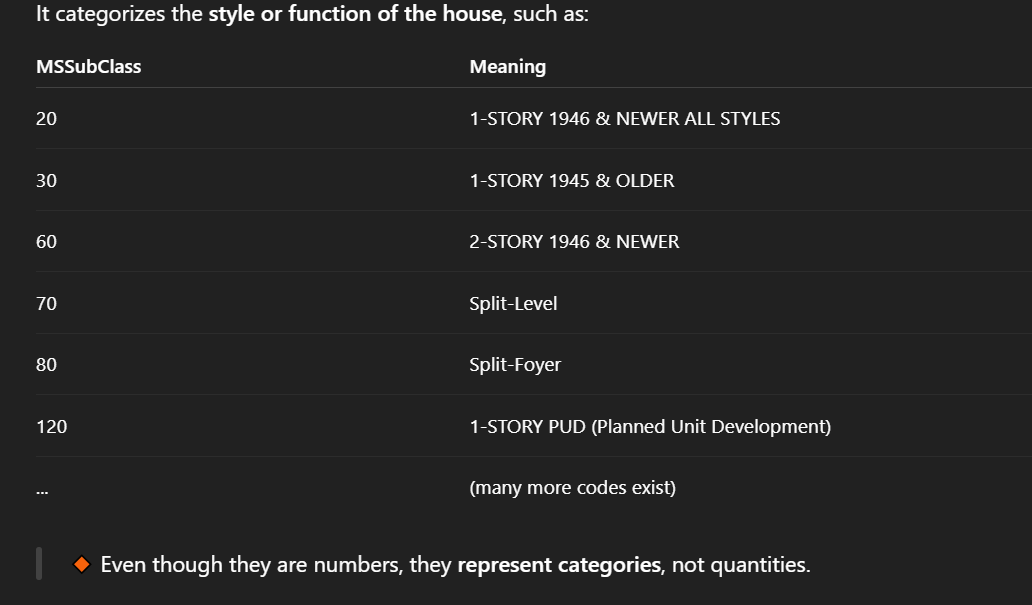

In [13]:
from IPython.display import Image

# Show image from local path
Image(filename='MSSubclass_Meaning.png')  # replace with your image file name
# Understanding what is MSSubclass.

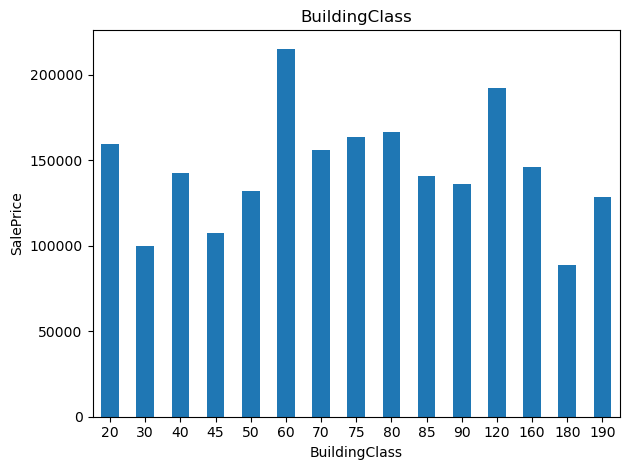

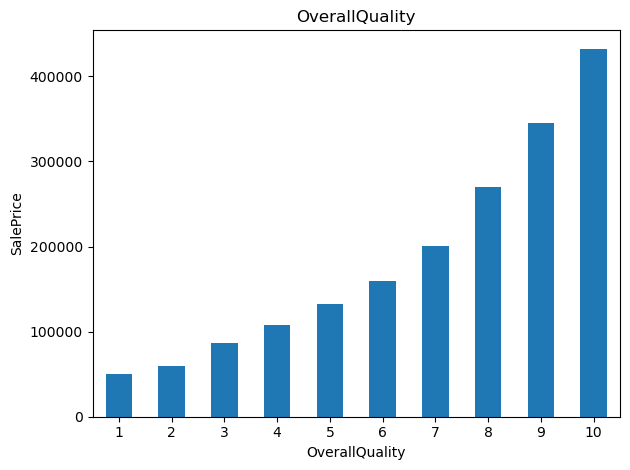

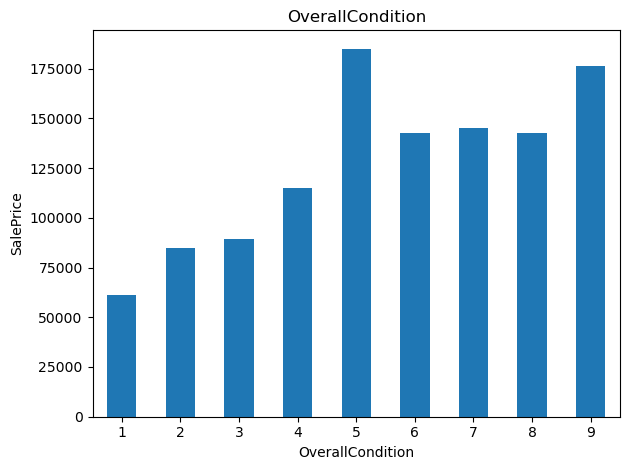

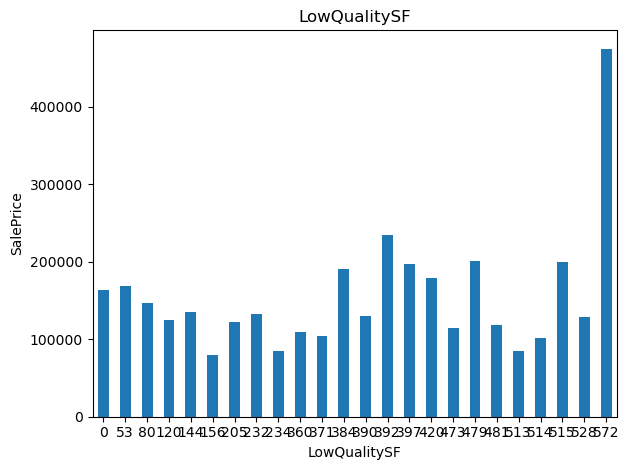

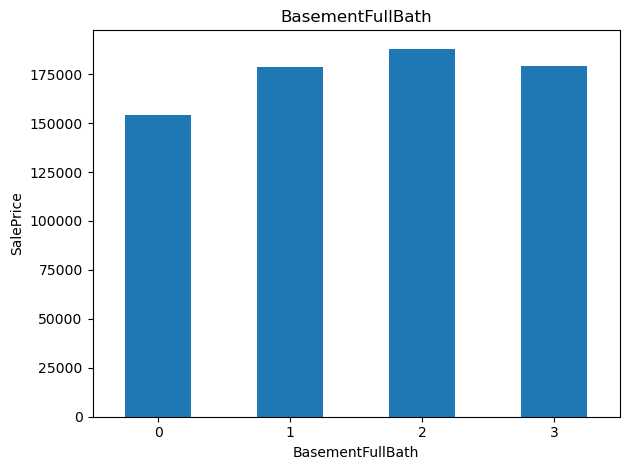

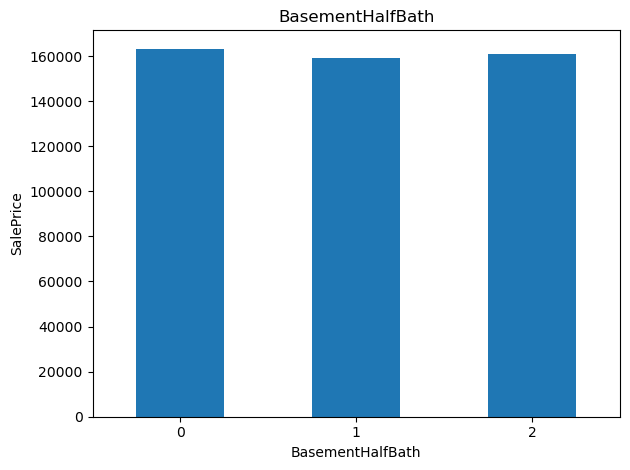

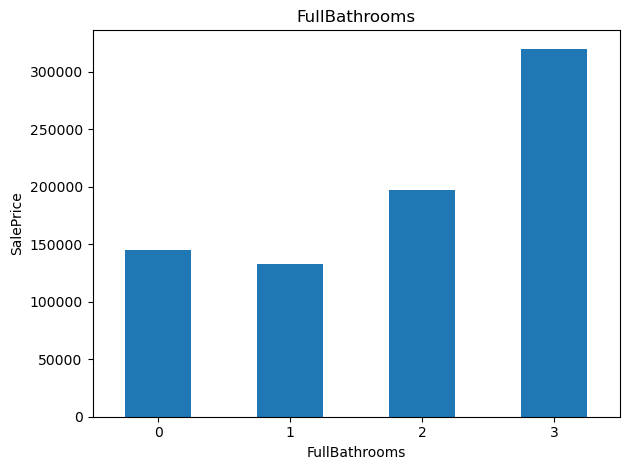

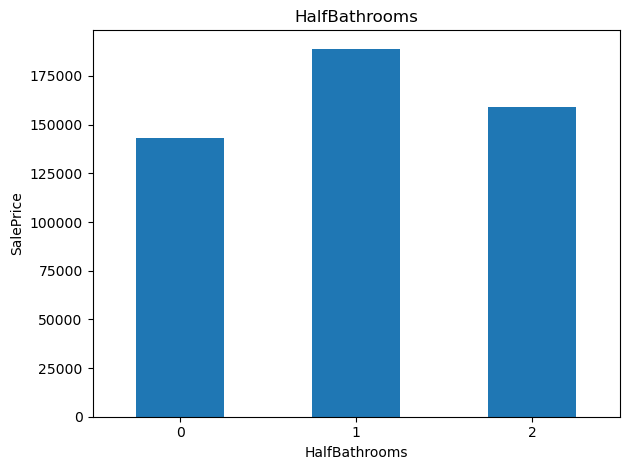

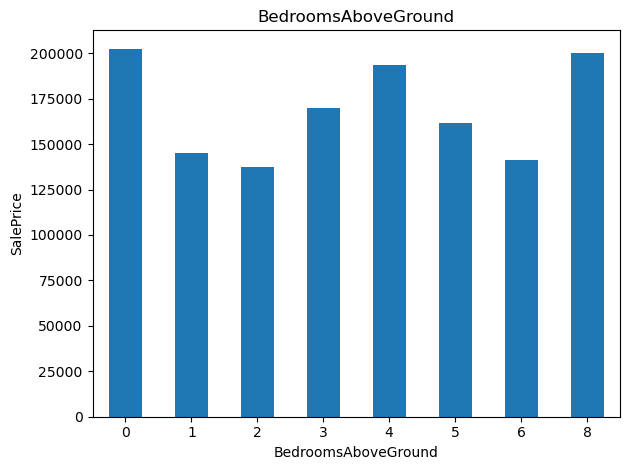

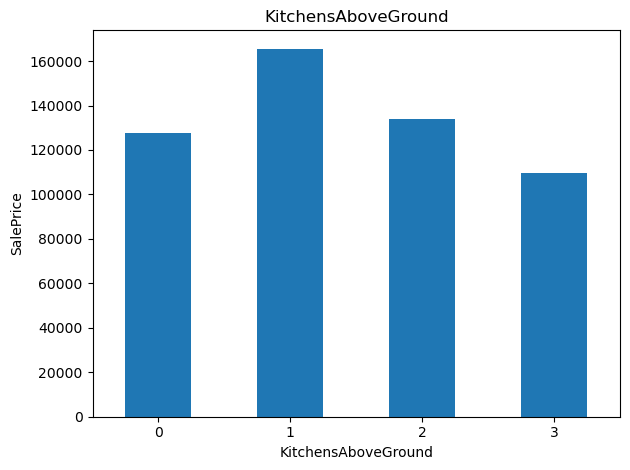

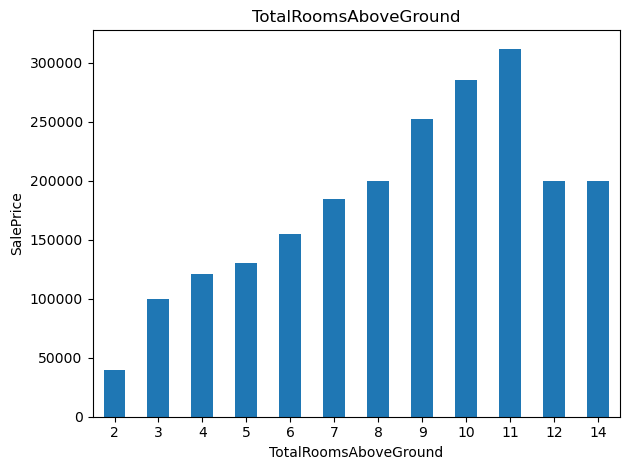

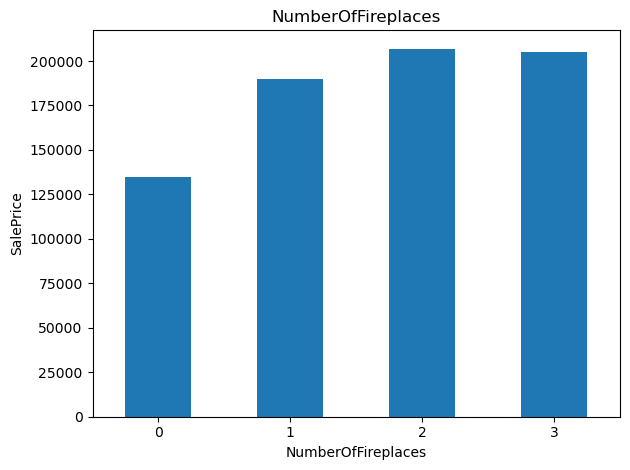

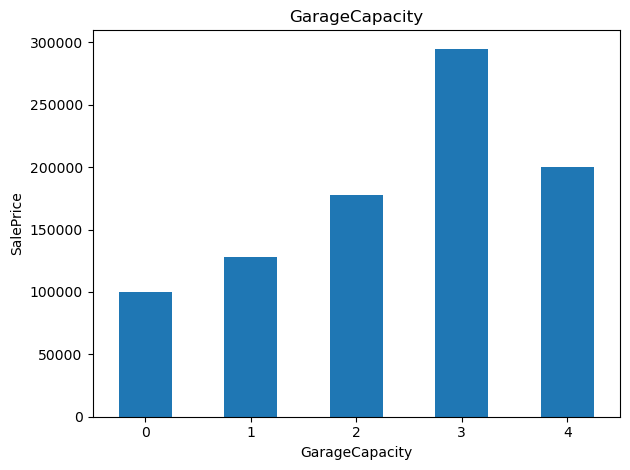

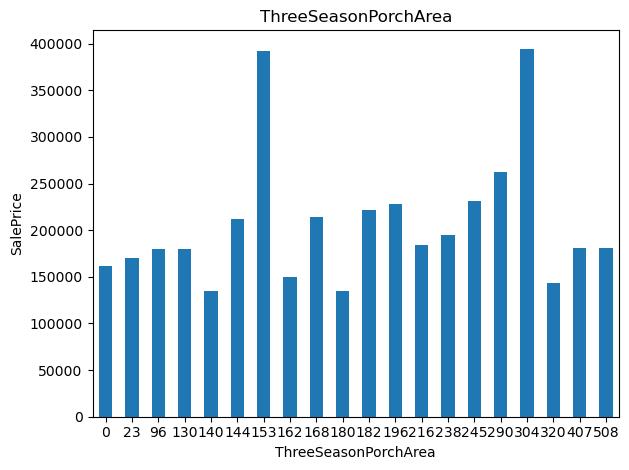

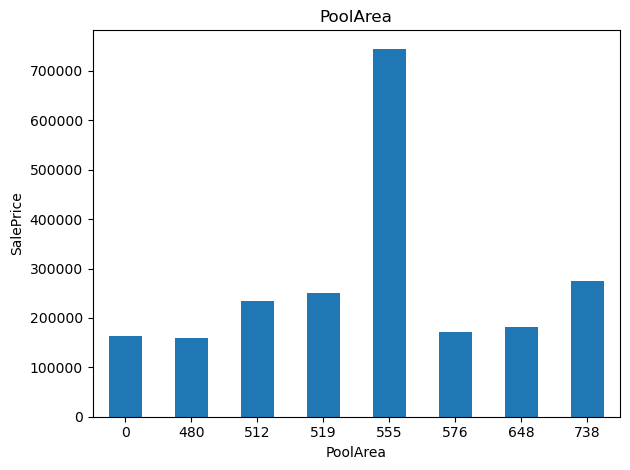

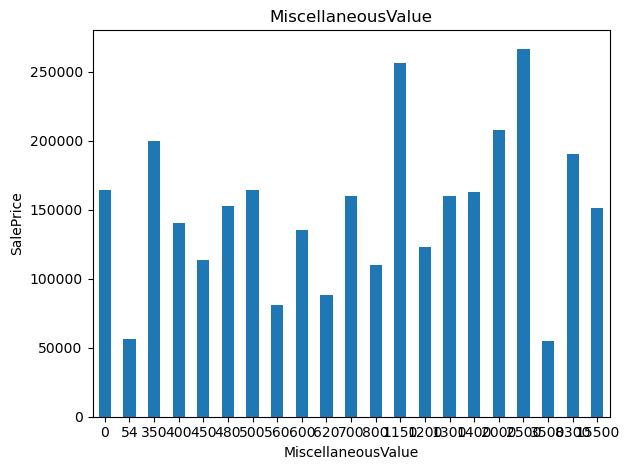

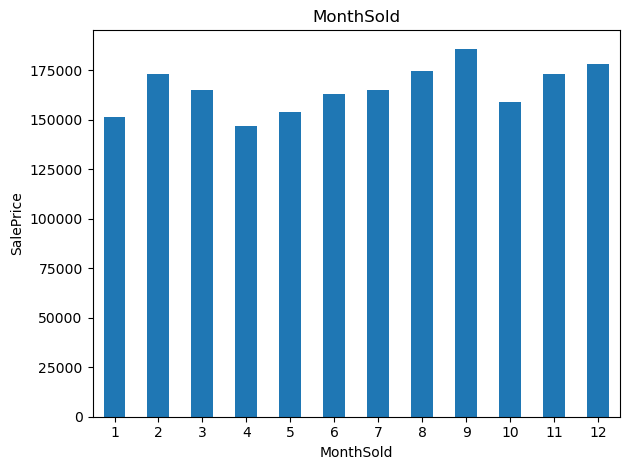

In [130]:
# discrete_cols vs saleprice
for col in discrete_df:
    data = df.copy()
    data.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.xticks(rotation = 0)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [15]:
# Now, Continous variable.
continuous_cols = [col for col in numerical_df if col not in discrete_cols + year_features + ['ID']]
continuous_df = df[continuous_cols]
continuous_df.head(3)

,LotFrontageFt,LotAreaSqFt,MasonryArea,BasementFinishedArea1,BasementFinishedArea2,BasementUnfinishedSF,TotalBasementSF,FirstFloorSF,SecondFloorSF,AboveGroundLivingArea,GarageArea,WoodDeckArea,OpenPorchArea,EnclosedPorchArea,ScreenPorchArea,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500


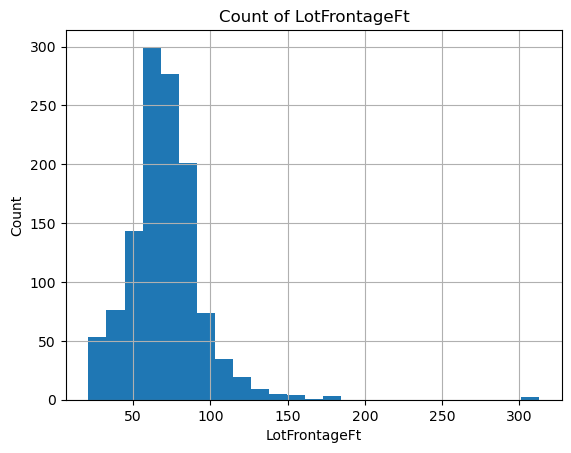

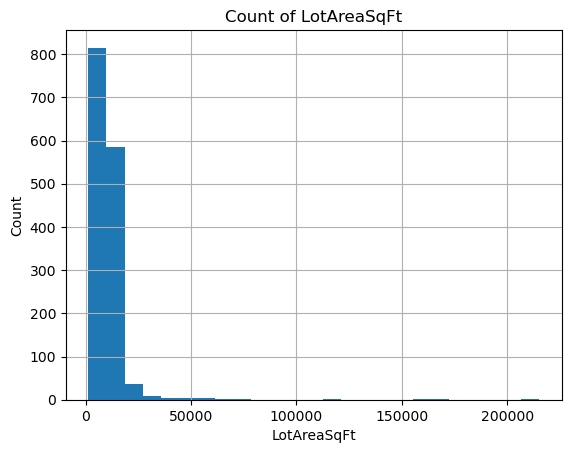

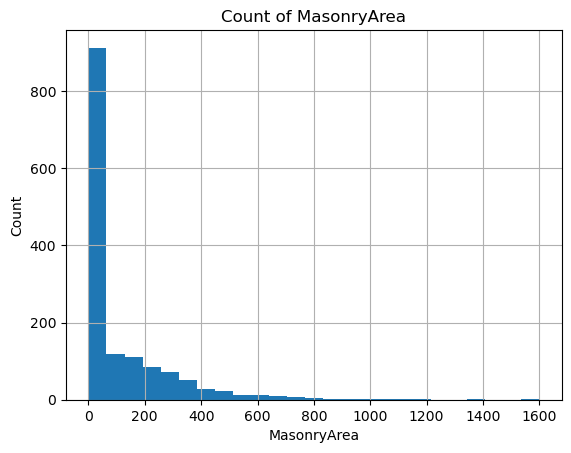

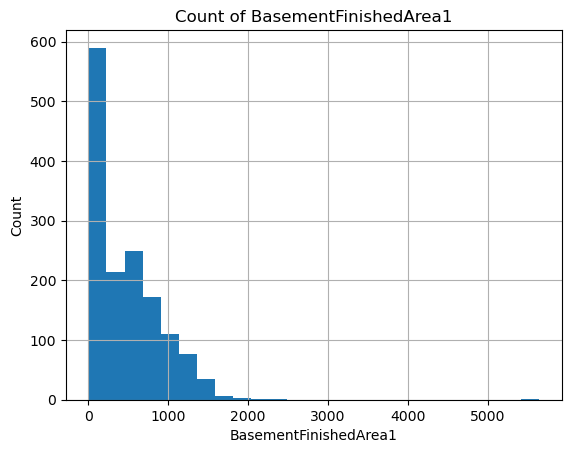

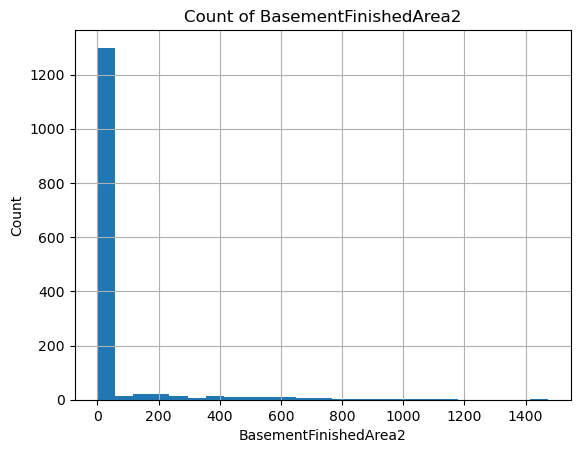

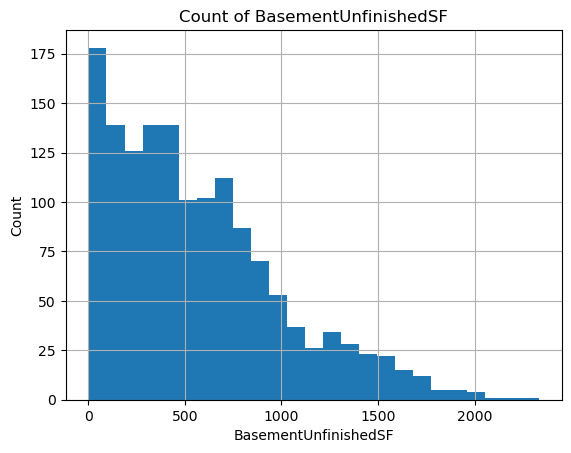

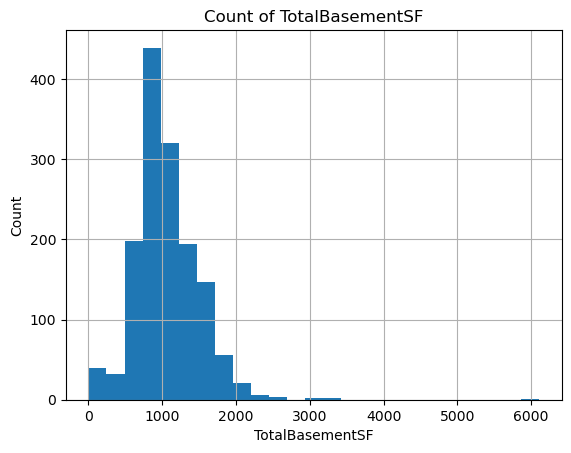

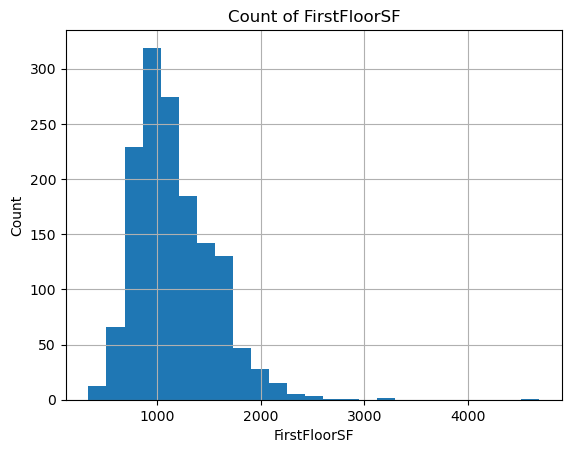

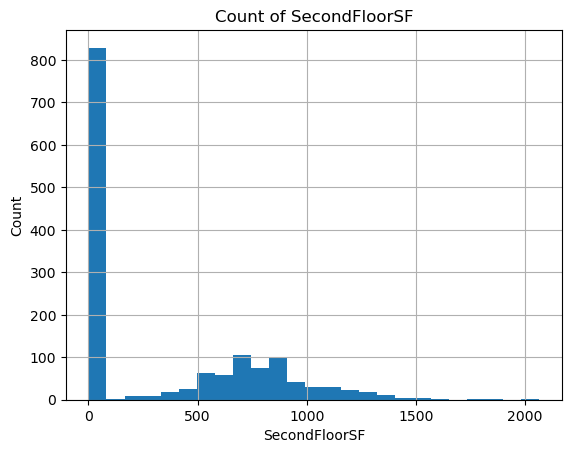

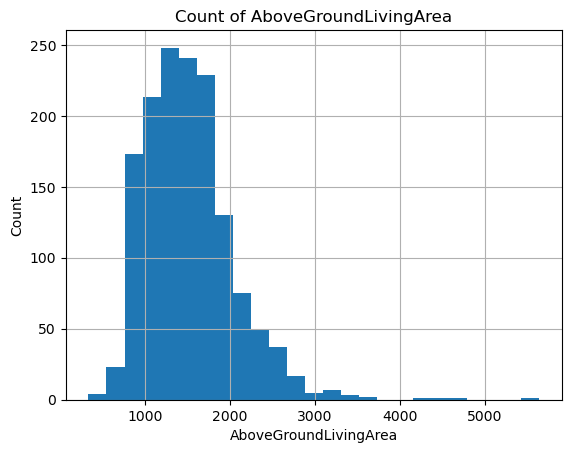

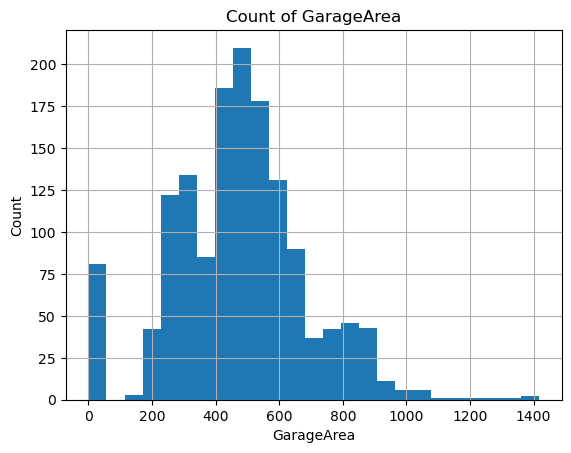

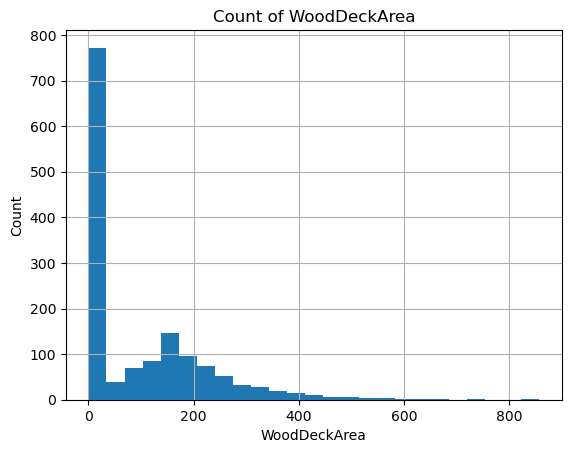

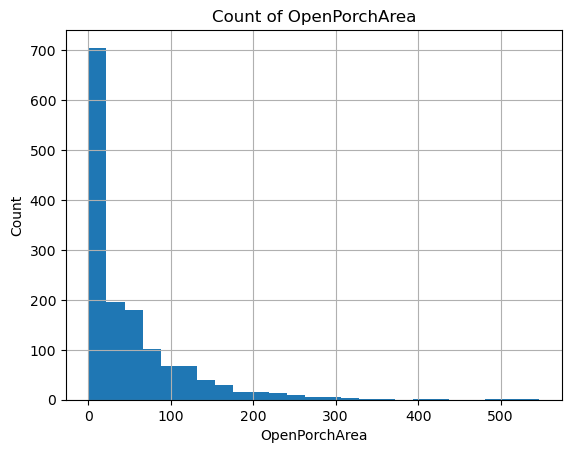

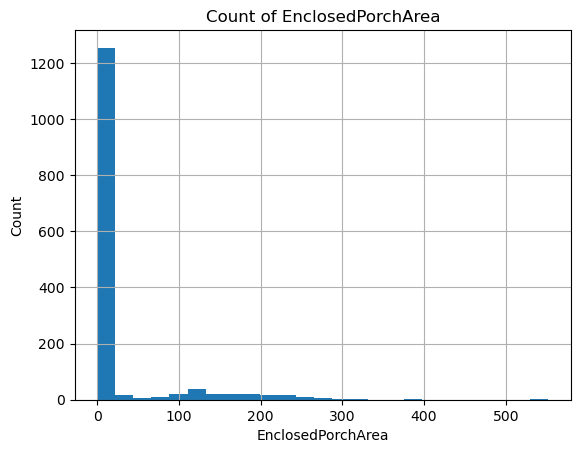

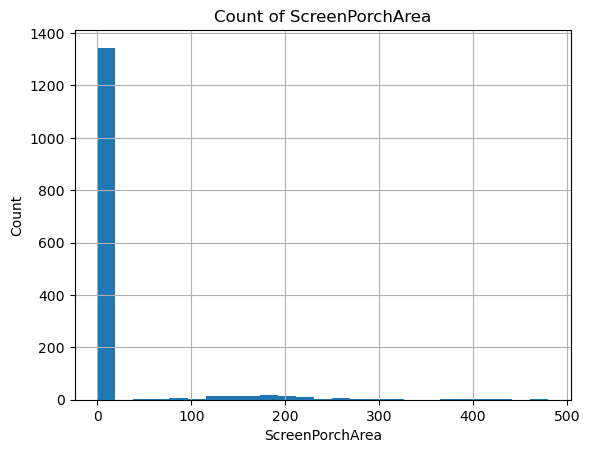

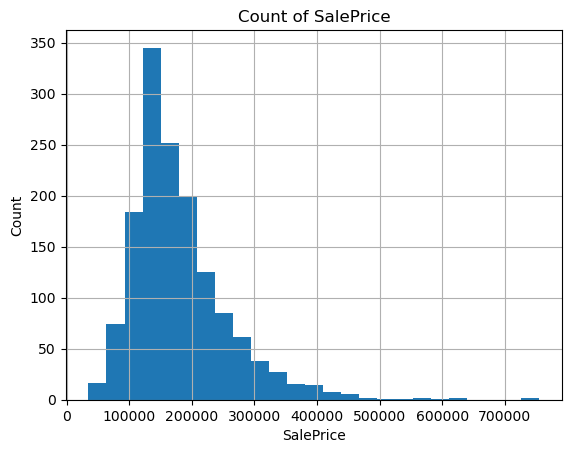

In [28]:
for col in continuous_cols:
    data = df.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout
    plt.title(f'Count of {col}')
    plt.show()

In [27]:
for col in continuous_df:
    data = df.copy()
    data[col].scatter()
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.title(f'{col} vs Sale Price')

AttributeError: 'Series' object has no attribute 'scatter'